# Project: Investigate a Dataset (TMDb Movie Dataset)

## By Yashika Paneri

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<h3>Overview:</h3>
In this Data Analysis process I am using TMDb movies dataset. The dataset contains information about 10.000 movies, including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

<h3>Questions:</h3>
<br>1. Which movie has made the most and least profit?
<br>2. Which movie had highest and lowest budgets?
<br>3. Which movie with most and least earned revenue?
<br>4. Movies with longest and shortest runtime values
<br>5. Average runtime of all the movies.
<br>6. Successful genres 
<br>7. Average budget of profitable movies
<br>8. Average revenue of profitable movies
<br>9. Average duration of profitable movies
<br>10. What is the relationship between popularity and vote_count in profitable movies?

In [25]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Key notes**: In this section I will load the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [26]:
# Load the data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')

#printing first five rows with defined columns of tmdb-movies database
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> ### Dataset Observation
>
>1. Some Missing value, some data of budget and revenue are Zero.
>
>2. No standar unit currency used in Dataset. Let's assuming the currency unit is dollar


In [27]:
# get a concise summary of the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [28]:
# return a tuple of the dimensions of the dataframe
df.shape

(10866, 21)

In [29]:
# return the datatypes of the columns

df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [30]:
# Generates descriptive statistics, excluding NaN values

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning (Remove unused information from Datasets)

> **1. Check for missing data**

In [31]:
df.columns[df.isnull().any()]

Index(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies'],
      dtype='object')

> #### based on questions, observation and the missing data above we can remove some unused column such as id, imdb_id, homepage, production_companies, keywords, homepage. Then assign as new DataFrame


In [32]:
# list of column to be deleted
delete_col=['id', 'imdb_id','homepage', 'keywords', 'overview', 'production_companies']

# deleting the columns
df= df.drop(delete_col,1)

# previewing the new dataset
df.head(4)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


>**2. Removing duplicates**

In [33]:
# drop duplicates
df.drop_duplicates(inplace=True)

# confirm correction
sum(df.duplicated())

0

>**3. Changing the release date column into standard date format**

In [34]:
df.release_date = pd.to_datetime(df['release_date'])

In [35]:
# printing the changed dataset
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

>**4. Discarding for zero value in budget and revenue column.**

In [36]:
# creating temporary of revenue and budget column
temp=['budget', 'revenue']

#first convert the zero value to NAN value for easy access next step
#this will replace all the value from '0' to NAN in the list
df[temp] = df[temp].replace(0, np.NAN)

#Removing all the row which has NaN value in temp 
df.dropna(subset = temp, inplace = True)

rows, col = df.shape

>**5. Replacing zero with NAN in runtime column**

In [37]:
# replacing 0 with NaN of runtime column in the dataset
df['runtime'] = df['runtime'].replace(0, np.NAN)

> So the zero as NAN will be excluded in the next step

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Which movie had highest and lowest budgets?

In [38]:
# reusable function to calculate lowest and highest valuebased on specific column
def calc_low_high(col):
    # for lowest bound
    low = df[col].idxmin()
    res_low = pd.DataFrame(df.loc[low])
    
    #for highest bound
    high = df[col].idxmax()
    res_high = pd.DataFrame(df.loc[high])
    
    #concat the 
    result = pd.concat([res_low, res_high], axis=1)
    
    return result

# calling the function for budget column
calc_low_high('budget')

,2618,2244
popularity,0.090186,0.25054
budget,1,4.25e+08
revenue,100,1.10876e+07
original_title,Lost & Found,The Warrior's Way
cast,David Spade|Sophie Marceau|Ever Carradine|Step...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Jeff Pollack,Sngmoo Lee
tagline,A comedy about a guy who would do anything to ...,Assassin. Hero. Legend.
runtime,95,100
genres,Comedy|Romance,Adventure|Fantasy|Action|Western|Thriller
release_date,1999-04-23 00:00:00,2010-12-02 00:00:00


### Research Question 2: Which movie with most and least earned revenue?

In [39]:
calc_low_high('revenue')

,5067,1386
popularity,0.462609,9.43277
budget,6e+06,2.37e+08
revenue,2,2.78151e+09
original_title,Shattered Glass,Avatar
cast,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Billy Ray,James Cameron
tagline,NaN,Enter the World of Pandora.
runtime,94,162
genres,Drama|History,Action|Adventure|Fantasy|Science Fiction
release_date,2003-11-14 00:00:00,2009-12-10 00:00:00


### Research Question 3: Which movie has made the most and least profit?

In [40]:
#because dataset doesn't have the profit so we can insert as new column based on revenue and budget subtraction
#profit placed after revenue column in column index 2
if 'profit' not in df.columns:
    df.insert(2,'profit',df['revenue']-df['budget'])


In [41]:
# check new profit column
df.head()

,popularity,budget,profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.363529e+09,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,2.284364e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,1.852382e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,1.868178e+09,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.316249e+09,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


### Research Question 4: Movies with longest and shortest runtime values

In [42]:
calc_low_high('runtime')

,5162,2107
popularity,0.208637,0.534192
budget,10,1.8e+07
profit,-5,-1.71287e+07
revenue,5,871279
original_title,Kid's Story,Carlos
cast,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director,Shinichiro Watanabe,Olivier Assayas
tagline,NaN,The man who hijacked the world
runtime,15,338
genres,Science Fiction|Animation,Crime|Drama|Thriller|History


### Research Question 5: Average runtime of all the movies.

In [43]:
# defining a function to find average of a column
def avg_fun(column):
    return df[column].mean()

#calling above function
avg_fun('runtime')

109.22029060716139

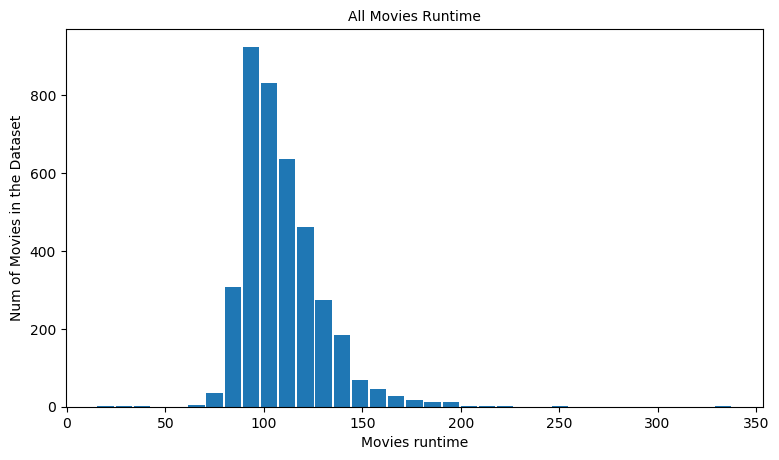

In [44]:
#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

plt.xlabel('Movies runtime', fontsize = 10) 
plt.ylabel('Num of Movies in the Dataset', fontsize=10)

#Name of the graph
plt.title('All Movies Runtime', fontsize=10)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

> The distribution of the above formed graph is positively skewed to the right. Most of the movies are timed between 80 to 115 minutes.
>**Lets analyzing more about movie runtime using different kind of plots like Box Plot and Data Point Plot**


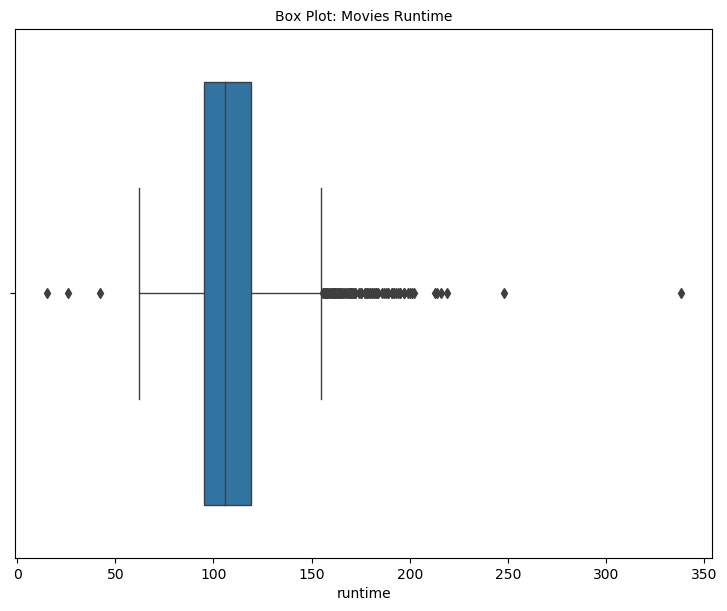

In [45]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 100)

#Name of the graph
plt.title('Box Plot: Movies Runtime', fontsize=10)

#using seaborn to generate the boxplot
sns.boxplot(df['runtime'], linewidth = 1)
#diplaying the graph
plt.show()

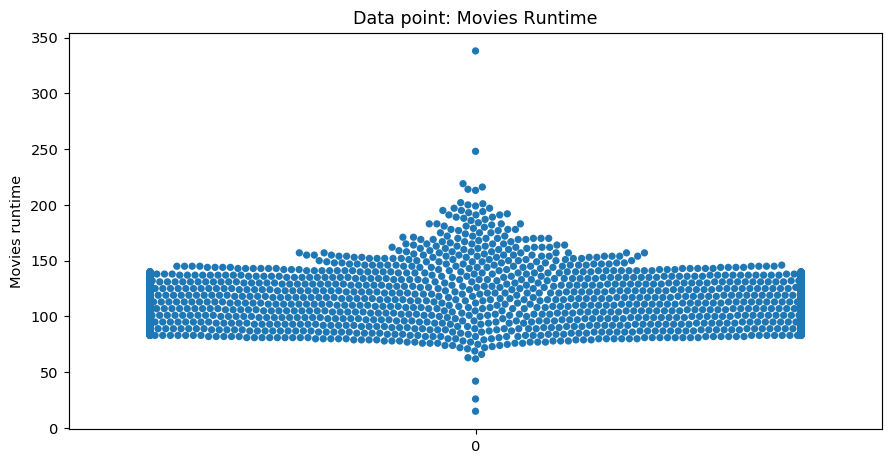

In [46]:

plt.figure(figsize=(10,5), dpi = 105)
#using seaborn to generate the plot
sns.swarmplot(data=df['runtime'])

plt.title('Data point: Movies Runtime')
plt.ylabel('Movies runtime', fontsize=10)

#displaying the plot
plt.show()

In [47]:
#getting specific runtime 
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

>By looking at both the plot and calculations, we can conclude that..
>
> 1. 25% of movies have a runtime of less than 95 minutes
> 2. 50% of movies have a runtime of less than 109 minutes. (median)
> 3. 75% of movies have a runtime of less than 119 minutes

In [48]:
df['profit'].mean()

70482919.14322782

In [49]:
# profit mean used for bounds
# selecting the movies having profit $70M or more
profitable = df[df['profit'] >= 70482919]

# reindexing new data
profitable.index = range(len(profitable))

# we will start from 1 instead of 0
profitable.index = profitable.index + 1

# printing the changed dataset
profitable.head()

,popularity,budget,profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,32.985763,150000000.0,1.363529e+09,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,28.419936,150000000.0,2.284364e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
3,13.112507,110000000.0,1.852382e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
4,11.173104,200000000.0,1.868178e+09,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5,9.335014,190000000.0,1.316249e+09,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [50]:
#counting the no.of rows in the new data base
len(profitable)

1066

### Research Question 6: Successful genres (with respest to the profitable movies)

In [51]:
#function which will take any column as argument from and keep its track 
def track(col):
    #will take a column, and separate the string by '|'
    data = profitable[col].str.cat(sep = '|')
    
    #with pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #descending order arrange
    count = data.value_counts(ascending = False)
    
    return count

In [52]:
# tracking variable to store the return value
count = track('genres')
# printing top 5 values
count.head()

Comedy       386
Action       385
Drama        368
Adventure    321
Thriller     312
dtype: int64

> Lets do a graphical analysis of the above collected data.

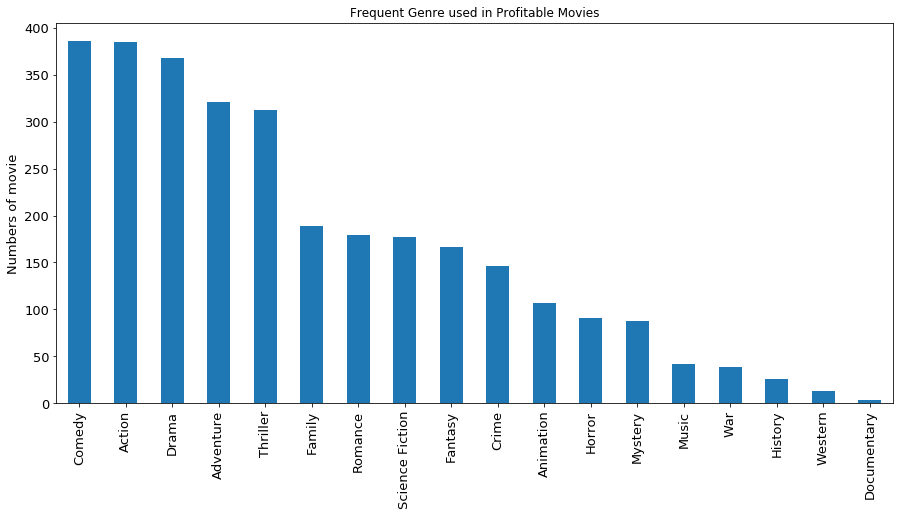

In [53]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = False, inplace = True)

#ploting
lt = count.plot.bar(fontsize = 13)

#title
lt.set(title = 'Frequent Genre used in Profitable Movies')

# on y axis
lt.set_ylabel('Numbers of movie', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(15, 7)

#ploting the graph
plt.show()

### Research Question 7: Average budget  (with respest to the profitable movies)

In [54]:
#New function to find average 
def calc_avg(column):
    return profitable[column].mean()

# calculate average budget
calc_avg('budget')

66525485.24577861

> the result show the movies having profit of 70 million dollar and more have an average budget of 66 million dollar.

### Research Question 8: Average revenue  (with respest to the profitable movies)

In [55]:
# calculate average revenue
calc_avg('revenue')

295445263.5703565

>The movies having profit of 70 million dollar and more have an average revenue of 295 million dollar.

### Research Question 9: Average duration of the movie  (with respest to the profitable movies)

In [56]:
# calculate average runtime duration
calc_avg('runtime')

114.66697936210132

The movies having profit of 70 million dollar and more have an average duration of 114 minutes.

<a id='conclusions'></a>
## Conclusions

> This was a very interesting data analysis. We came out with resulting some facts about movies. After this analysis process we can take conclusion that:
>
> **Profitable movies have criteria**
> 1. Average Budget must be around 66 millon dollar
> 2. Average duration of the movie must be 114 minutes 
> 3. Genre must be : Comedy, Action, Drama, Adventure, Thriller
> 4. Average vote average around 6.43

> By following of these criteria suggestion the movie might be profitable and hence can earn an average revenue around 295 million dollar.
>
>**Limitations:**
The analysis process was done which had a significant amount of profit of around 70 million dollar on various runtime, genres. As per our observation before the budget and revenue column do not have any currency unit or documentation representing what exactly currency mechanism used, it might be some possibility of different movies have budget in different currency unit. Moreover we are not sure if the data provided to us is complete corect and up-to-date. Dropping or discarding the rows with missing values in our case is zero value also affected the overall analysis. The result of analysis process might not be completely error free but by following these criteria can increase the probability of a movie to becoming profitable. 

In [57]:
# calculate average runtime duration
calc_avg('vote_average')

6.43574108818011

### Research Question 10: What is the relationship between popularity and vote_count in profitable movies?

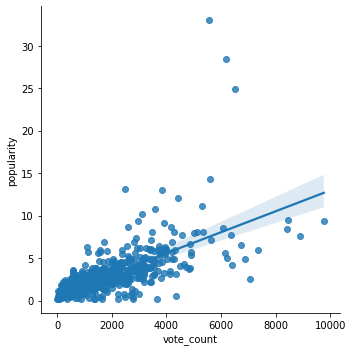

In [58]:
sns.lmplot(x='vote_count', y='popularity', data=profitable);

> There is positive correlation between popularity and vote_count.